In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
hasy = pd.read_csv("HASY/hasy-data-labels.csv")
hasy.head()

,path,symbol_id,latex,user_id
0,hasy-data/v2-00000.png,31,A,50
1,hasy-data/v2-00001.png,31,A,10
2,hasy-data/v2-00002.png,31,A,43
3,hasy-data/v2-00003.png,31,A,43
4,hasy-data/v2-00004.png,31,A,4435


In [3]:
hasy = hasy[(hasy["symbol_id"] >= 70) & (hasy["symbol_id"] <= 80)]
hasy.head()

,path,symbol_id,latex,user_id
345,hasy-data/v2-00345.png,70,0,10
346,hasy-data/v2-00346.png,70,0,31
347,hasy-data/v2-00347.png,70,0,10
348,hasy-data/v2-00348.png,70,0,10
349,hasy-data/v2-00349.png,70,0,10


In [4]:
def rgb2gray(rgb):
    return rgb[:,:,0]

In [5]:
print(os.getcwd())
os.chdir("/home/hdaniel/Data-Science/Introduction-to-data-science/week3/HASY/")

imlist = []
for file in hasy["path"]:
    im = rgb2gray(plt.imread(file)).flatten()
    imlist.append(im)
hasy["data"] = imlist
hasy

/home/hdaniel/Data-Science/Introduction-to-data-science/week3


,path,symbol_id,latex,user_id,data
345,hasy-data/v2-00345.png,70,0,10,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
346,hasy-data/v2-00346.png,70,0,31,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
347,hasy-data/v2-00347.png,70,0,10,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
348,hasy-data/v2-00348.png,70,0,10,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
349,hasy-data/v2-00349.png,70,0,10,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
...,...,...,...,...,...
20823,hasy-data/v2-20823.png,79,9,101356,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
20824,hasy-data/v2-20824.png,79,9,116471,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
20825,hasy-data/v2-20825.png,79,9,124511,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ..."
20826,hasy-data/v2-20826.png,79,9,124916,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ..."


In [6]:
hasy.to_csv("preprocessed_hasy.csv")

In [104]:
os.chdir("/home/hdaniel/Data-Science/Introduction-to-data-science/week3/")

In [105]:
hasy = hasy.sample(frac=1).reset_index(drop=True)
hasy.head()

,path,symbol_id,latex,user_id,data
0,hasy-data/v2-00369.png,71,1,8486,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,hasy-data/v2-20472.png,75,5,15,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,hasy-data/v2-20636.png,77,7,124916,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ..."
3,hasy-data/v2-20678.png,78,8,5879,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,hasy-data/v2-20189.png,72,2,5895,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [106]:
frac = int(hasy.shape[0]*0.8)
train = hasy[:frac]
test = hasy[frac:]

In [107]:
print(np.stack(train["data"]))

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [108]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(np.stack(train["data"]), train["symbol_id"])

/home/hdaniel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hdaniel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [138]:
print("Logistic Regression:")
yfit = model.predict(np.stack(test["data"]))
np.count_nonzero(yfit == test["symbol_id"]) / yfit.shape[0]

Logistic Regression:


0.8725490196078431

In [142]:
print("Guessing:")
np.count_nonzero(test["symbol_id"] == train["symbol_id"].mode()[0], axis=0) / test.shape[0]

Guessing:


0.14215686274509803

In [124]:
miss = []
for i, n in enumerate(yfit - test["symbol_id"]):
    if n != 0: miss.append(i)

Classified as:  0


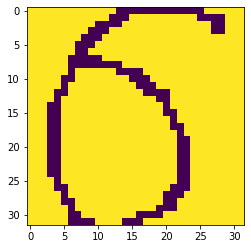

In [129]:
INDEX = 5
print("Classified as: ", yfit[INDEX]-70)
plt.imshow(test.iloc[miss[INDEX]]["data"].reshape((32, 32)))